<a href="https://colab.research.google.com/github/Zainabb110/CS584-Project/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')
fileName = 'gdrive/My Drive/Colab Notebooks/expenses.csv'
data = pd.read_csv(fileName)
data.head()

Mounted at /content/gdrive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data.shape


(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#data.drop(["sex"], axis = 1, inplace = True)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


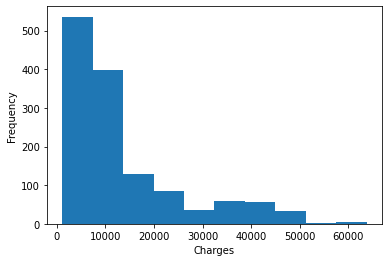

In [ ]:
plt.hist(data["charges"])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#data = pd.get_dummies(data, columns = ["sex" ,"smoker", "region"], drop_first = True)

In [ ]:
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [ ]:
X = pd.get_dummies(X, columns = ["sex" ,"smoker", "region"], drop_first = True)
print(X)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [ ]:
X_train.shape

(1070, 8)

In [ ]:
y_train.shape

(1070,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
print(y_pred)

[ 3791.9898585   5125.2912046  14501.4435119   2432.8416296
 16634.030778   29011.2283945  13558.1108672   7313.5808631
 19666.1369702  13600.2929596   8820.29508     4715.0882745
  9734.1307482   3604.6398808   7957.4174581  43377.0689395
 15189.3264348  11729.931185    4804.112059   16660.0751367
 13812.0767981   5112.194839    9358.0708678  21715.8331904
 15718.4301093  41410.1187251   5677.8863503  47112.8445494
 21326.6788757  14246.9306386  18823.1712873   2163.073291
 47611.7186994  34652.7172989   7272.7646915  19324.1189472
  4060.661337   39440.755904    3807.464863   29618.7231499
  9871.4837836  16362.5394401   4294.2451631   4706.5705925
  2330.20609538  4194.584198    4721.7530254   5440.9643863
  2373.5296969  10166.2459613  14913.161738   10391.3174753
  6907.64273859  7459.1954069   7064.0794168  12721.980119
 10846.8307184  38840.5402059   7101.1824724  11652.8685111
 17051.1449458   4509.84765655  7912.2785394   9622.6827321
 16786.0640349   7341.8271172   2333.62906

In [ ]:
print(y_test)

12       1826.84300
306     20177.67113
318      7421.19455
815      1877.92940
157     15518.18025
           ...     
713      1984.45330
1282    14283.45940
531     14043.47670
537      8825.08600
1015    12124.99240
Name: charges, Length: 268, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(mse)

19612646.945000242


In [ ]:
rmse = mse ** 0.5
print("test RMSE:", rmse)
print("train RMSE:", mean_squared_error(y_train, y_pred_train)**0.5)

test RMSE: 4428.616820746659
train RMSE: 1939.5803162337984


Text(0, 0.5, 'Predicted Testing y')

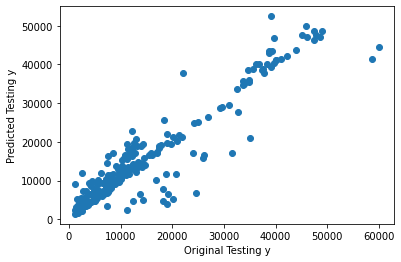

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Original Testing y")
plt.ylabel("Predicted Testing y")


Text(0, 0.5, 'Predicted Testing y')

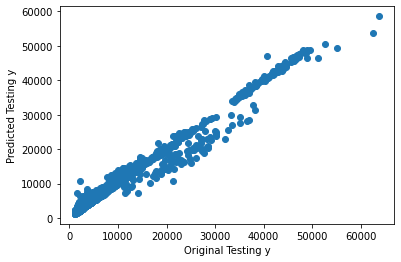

In [ ]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Original Training y")
plt.ylabel("Predicted Training y")

In [ ]:
print("R2: ", r2_score(y_test, y_pred))

R2:  0.8749257891982611
